In [1]:
from src.submodels.gflownet.algo.config import TBVariant
from src.submodels.gflownet.config import Config,init_empty
import torch
import gc
from src.model.scent_trainer import ScentTrainer

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.



############################################################
#                     Initialize MCFs                      #
############################################################

Filter                                        Min        Max
------------------------------------------------------------
LogP                                         0.06       4.91
Molecular Weight                           100.12     282.46
HBAB + HBD                                   0.00       5.00
TPSA                                         0.00      63.32
Rotatable Bonds                              0.00      11.00
NO2 Groups                                   0.00       0.00
Heteroatoms                                  0.00       4.00
Aromatic Rings                               0.00       1.00
Atom Count                                   0.00      20.00
Triple Bonds                                 0.00       0.00
Oxygen Chain Length                          0.00       1.00

#####################

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:


best_params = {
    # Fixed
    'algo_variant': 1, 
    'opt_momentum': 0.651294024078677,
    'opt_weight_decay': 3.9731330248837407e-07,

    # Learned
    'algo_sampling_tau': 0.9840271666819398,
    'algo_Z_learning_rate': 3.157262808970358e-05,
    'opt_learning_rate': 0.0002566028526773609,
    'opt_clip_grad_param': 32.27804232610293
    }

In [3]:
# Initialize default hyperprameters
config = init_empty(Config())

# For CPU
config.device = torch.device('cpu')
config.num_workers = 0
config.log_dir ="./logs/hyperbest2long"
config.overwrite_existing_exp=True

config.validate_every=1000
config.algo.num_from_policy = 32
config.algo.num_from_dataset = 32
config.algo.valid_num_from_policy= 32
config.algo.valid_num_from_dataset= 32
config.num_training_steps = 3000 #10_000
config.print_every =1
config.seed = 1


config.algo.tb.do_parameterize_p_b = False # Dont know how to load the model with this parameter = True
config.num_validation_gen_steps = 1
#config.overwrite_existing_exp=True
config.algo.tb.mask_invalid_rewards = False
config.algo.tb.std_cut_losses = False
config.algo.tb.std_cut_scale = 1


# OPTUNA PARAMETERS
# Algo
config.algo.tb.variant = best_params["algo_variant"]
config.algo.sampling_tau = best_params["algo_sampling_tau"]
config.algo.tb.Z_learning_rate = best_params["algo_Z_learning_rate"]
# Opt
config.opt.clip_grad_param = best_params["opt_clip_grad_param"]
config.opt.momentum = best_params["opt_momentum"]
config.opt.learning_rate = best_params["opt_learning_rate"]
config.opt.weight_decay = best_params["opt_weight_decay"]




gc.collect()
trainer = ScentTrainer(config, print_config=False)


trainer.run(logger=None)
gc.collect()
    
 

20/05/2025 16:56:18 - INFO - logger - Starting training
20/05/2025 16:56:24 - INFO - logger - iteration 1 : offline_loss:887.98 online_loss:1726.15 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-20.43 invalid_losses:1726.14 backward_vs_unif:0.00 logZ:0.17 loss:1307.06 n_loss:0.00 tb_loss:1307.06 batch_entropy:47.80 traj_lens:12.16 grad_norm:2407.53 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:3.06 time_spent:6.18
20/05/2025 16:56:30 - INFO - logger - iteration 2 : offline_loss:182.13 online_loss:1822.93 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-21.08 invalid_losses:1822.93 backward_vs_unif:0.00 logZ:-0.29 loss:1002.53 n_loss:0.00 tb_loss:1002.53 batch_entropy:33.13 traj_lens:11.36 grad_norm:760.13 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:2.60 time_spent:5.72
20/05/2025 16:56:38 - INFO - logger - iteration 3 : offline_loss:624.48 online_loss:1989.85 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-24.41 invalid_losses:2

[17:39:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[17:39:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[17:39:05] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[17:39:05] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


20/05/2025 17:39:23 - INFO - logger - iteration 97 : offline_loss:23.05 online_loss:182.12 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-180.45 invalid_losses:187.26 backward_vs_unif:0.00 logZ:9.30 loss:102.59 n_loss:0.00 tb_loss:102.59 batch_entropy:104.97 traj_lens:28.98 grad_norm:5672.58 grad_norm_clip:32.28 sampled_reward_avg:0.02 train_time:14.63 time_spent:31.36
20/05/2025 17:39:58 - INFO - logger - iteration 98 : offline_loss:17643.91 online_loss:180.89 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-165.30 invalid_losses:180.89 backward_vs_unif:0.00 logZ:9.50 loss:8912.40 n_loss:0.00 tb_loss:8912.40 batch_entropy:148.44 traj_lens:32.92 grad_norm:24391.54 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:16.60 time_spent:35.02
20/05/2025 17:40:32 - INFO - logger - iteration 99 : offline_loss:44.53 online_loss:241.96 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-163.70 invalid_losses:249.64 backward_vs_unif:0.00 logZ:10.30 loss:143.25

[18:34:55] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:34:55] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:34:55] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:34:55] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


20/05/2025 18:35:08 - INFO - logger - iteration 252 : offline_loss:3452.75 online_loss:208.57 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-102.27 invalid_losses:208.57 backward_vs_unif:0.00 logZ:9.53 loss:1830.66 n_loss:0.00 tb_loss:1830.66 batch_entropy:100.69 traj_lens:23.77 grad_norm:5545.33 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:9.75 time_spent:19.94
20/05/2025 18:35:26 - INFO - logger - iteration 253 : offline_loss:129.07 online_loss:373.39 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-93.95 invalid_losses:384.07 backward_vs_unif:0.00 logZ:12.65 loss:251.23 n_loss:0.00 tb_loss:251.23 batch_entropy:70.85 traj_lens:22.47 grad_norm:2671.35 grad_norm_clip:32.28 sampled_reward_avg:0.02 train_time:8.81 time_spent:18.75
20/05/2025 18:35:48 - INFO - logger - iteration 254 : offline_loss:41511.37 online_loss:198.68 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-100.17 invalid_losses:198.68 backward_vs_unif:0.00 logZ:10.08 loss:2085

[18:41:50] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:41:50] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:41:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:41:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


20/05/2025 18:42:06 - INFO - logger - iteration 272 : offline_loss:2101.88 online_loss:278.91 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-114.59 invalid_losses:278.91 backward_vs_unif:0.00 logZ:22.14 loss:1190.40 n_loss:0.00 tb_loss:1190.40 batch_entropy:105.36 traj_lens:26.22 grad_norm:5399.71 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:11.77 time_spent:24.55
20/05/2025 18:42:29 - INFO - logger - iteration 273 : offline_loss:18.16 online_loss:319.60 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-119.84 invalid_losses:329.28 backward_vs_unif:0.00 logZ:23.46 loss:168.88 n_loss:0.00 tb_loss:168.88 batch_entropy:80.27 traj_lens:24.95 grad_norm:4554.12 grad_norm_clip:32.28 sampled_reward_avg:0.02 train_time:11.13 time_spent:22.94
20/05/2025 18:42:52 - INFO - logger - iteration 274 : offline_loss:41.29 online_loss:94.75 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-141.06 invalid_losses:96.23 backward_vs_unif:0.00 logZ:19.64 loss:68.02 

[18:47:05] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:47:05] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:47:06] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:47:06] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


20/05/2025 18:47:20 - INFO - logger - iteration 285 : offline_loss:37.88 online_loss:419.15 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-162.29 invalid_losses:419.15 backward_vs_unif:0.00 logZ:23.03 loss:228.52 n_loss:0.00 tb_loss:228.52 batch_entropy:106.99 traj_lens:25.77 grad_norm:14921.96 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:11.46 time_spent:23.89
20/05/2025 18:47:45 - INFO - logger - iteration 286 : offline_loss:73.70 online_loss:238.65 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-153.36 invalid_losses:238.65 backward_vs_unif:0.00 logZ:20.65 loss:156.17 n_loss:0.00 tb_loss:156.17 batch_entropy:102.91 traj_lens:25.81 grad_norm:8773.15 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:12.14 time_spent:25.10
20/05/2025 18:48:10 - INFO - logger - iteration 287 : offline_loss:144.55 online_loss:302.39 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-124.04 invalid_losses:302.39 backward_vs_unif:0.00 logZ:18.94 loss:223.4

[19:56:45] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:56:45] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:56:45] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:56:45] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


20/05/2025 19:57:02 - INFO - logger - iteration 536 : offline_loss:877.10 online_loss:102.47 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-127.37 invalid_losses:102.47 backward_vs_unif:0.00 logZ:2.19 loss:489.78 n_loss:0.00 tb_loss:489.78 batch_entropy:100.45 traj_lens:27.44 grad_norm:4950.90 grad_norm_clip:32.28 sampled_reward_avg:0.00 train_time:12.60 time_spent:26.87
20/05/2025 19:57:26 - INFO - logger - iteration 537 : offline_loss:1488.68 online_loss:149.72 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-109.27 invalid_losses:152.66 backward_vs_unif:0.00 logZ:2.17 loss:819.20 n_loss:0.00 tb_loss:819.20 batch_entropy:89.21 traj_lens:25.58 grad_norm:6302.22 grad_norm_clip:32.28 sampled_reward_avg:0.02 train_time:11.26 time_spent:23.64
20/05/2025 19:57:50 - INFO - logger - iteration 538 : offline_loss:100.87 online_loss:263.23 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-110.70 invalid_losses:263.23 backward_vs_unif:0.00 logZ:2.19 loss:182.05 

[20:12:01] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[20:12:01] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[20:12:02] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[20:12:02] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


20/05/2025 20:12:16 - INFO - logger - iteration 571 : offline_loss:1614.34 online_loss:105.36 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-133.41 invalid_losses:111.81 backward_vs_unif:0.00 logZ:2.45 loss:859.85 n_loss:0.00 tb_loss:859.85 batch_entropy:99.11 traj_lens:25.06 grad_norm:15229.63 grad_norm_clip:32.28 sampled_reward_avg:0.08 train_time:11.02 time_spent:24.04
20/05/2025 20:12:38 - INFO - logger - iteration 572 : offline_loss:264.77 online_loss:103.92 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-117.38 invalid_losses:115.03 backward_vs_unif:0.00 logZ:2.54 loss:184.35 n_loss:0.00 tb_loss:184.35 batch_entropy:74.31 traj_lens:22.73 grad_norm:1954.56 grad_norm_clip:32.28 sampled_reward_avg:0.10 train_time:10.39 time_spent:21.91
20/05/2025 20:13:00 - INFO - logger - iteration 573 : offline_loss:56.40 online_loss:231.70 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-99.99 invalid_losses:266.95 backward_vs_unif:0.00 logZ:3.42 loss:144.05 n_

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


20/05/2025 21:44:53 - INFO - logger - validation - iteration 1000 : offline_loss:1057.47 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:-0.08 loss:1057.47 n_loss:0.00 tb_loss:1057.47 batch_entropy:63.07 traj_lens:17.38 eval_time:1.03
20/05/2025 21:44:55 - INFO - logger - validation - iteration 1000 : offline_loss:43.22 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:-0.08 loss:43.22 n_loss:0.00 tb_loss:43.22 batch_entropy:36.63 traj_lens:15.28 eval_time:0.82
20/05/2025 21:44:57 - INFO - logger - validation - iteration 1000 : offline_loss:40.02 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:-0.08 loss:40.02 n_loss:0.00 tb_loss:40.02 batch_entropy:39.60 traj_lens:16.84 eval_time:0.93
20/05/2025 21:44:59 - INFO - logger - validation - iteration 1000 :

[22:29:52] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 15


20/05/2025 22:30:10 - INFO - logger - iteration 1142 : offline_loss:24.81 online_loss:121.99 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-152.31 invalid_losses:162.93 backward_vs_unif:0.00 logZ:5.15 loss:73.40 n_loss:0.00 tb_loss:73.40 batch_entropy:77.83 traj_lens:25.80 grad_norm:569.51 grad_norm_clip:32.28 sampled_reward_avg:0.18 train_time:12.14 time_spent:27.58
20/05/2025 22:30:40 - INFO - logger - iteration 1143 : offline_loss:29.32 online_loss:141.40 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-176.04 invalid_losses:182.89 backward_vs_unif:0.00 logZ:5.31 loss:85.36 n_loss:0.00 tb_loss:85.36 batch_entropy:88.14 traj_lens:28.84 grad_norm:3747.46 grad_norm_clip:32.28 sampled_reward_avg:0.18 train_time:14.20 time_spent:30.47
20/05/2025 22:31:16 - INFO - logger - iteration 1144 : offline_loss:205.72 online_loss:126.97 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-198.56 invalid_losses:146.76 backward_vs_unif:0.00 logZ:5.17 loss:166.34 n_loss

[22:43:59] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:43:59] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:44:00] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:44:00] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


20/05/2025 22:44:18 - INFO - logger - iteration 1169 : offline_loss:406.02 online_loss:125.45 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-169.22 invalid_losses:168.55 backward_vs_unif:0.00 logZ:8.16 loss:265.73 n_loss:0.00 tb_loss:265.73 batch_entropy:94.19 traj_lens:28.17 grad_norm:2515.46 grad_norm_clip:32.28 sampled_reward_avg:0.18 train_time:13.79 time_spent:30.04
20/05/2025 22:44:50 - INFO - logger - iteration 1170 : offline_loss:23.32 online_loss:248.34 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-153.38 invalid_losses:281.49 backward_vs_unif:0.00 logZ:7.97 loss:135.83 n_loss:0.00 tb_loss:135.83 batch_entropy:88.06 traj_lens:29.16 grad_norm:3691.26 grad_norm_clip:32.28 sampled_reward_avg:0.08 train_time:14.69 time_spent:32.29
20/05/2025 22:45:26 - INFO - logger - iteration 1171 : offline_loss:142.14 online_loss:141.11 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-196.59 invalid_losses:165.16 backward_vs_unif:0.00 logZ:7.02 loss:141.63 

[00:06:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:06:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:06:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:06:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


21/05/2025 00:06:12 - INFO - logger - iteration 1390 : offline_loss:290.66 online_loss:222.20 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-56.84 invalid_losses:298.38 backward_vs_unif:0.00 logZ:-1.12 loss:256.43 n_loss:0.00 tb_loss:256.43 batch_entropy:48.65 traj_lens:16.45 grad_norm:1116.19 grad_norm_clip:32.28 sampled_reward_avg:0.21 train_time:5.25 time_spent:11.66
21/05/2025 00:06:25 - INFO - logger - iteration 1391 : offline_loss:1746.39 online_loss:136.01 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-65.90 invalid_losses:173.82 backward_vs_unif:0.00 logZ:-2.12 loss:941.20 n_loss:0.00 tb_loss:941.20 batch_entropy:70.22 traj_lens:17.78 grad_norm:9228.04 grad_norm_clip:32.28 sampled_reward_avg:0.27 train_time:5.87 time_spent:13.60
21/05/2025 00:06:38 - INFO - logger - iteration 1392 : offline_loss:80.92 online_loss:169.25 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-60.32 invalid_losses:227.57 backward_vs_unif:0.00 logZ:-2.59 loss:125.09 n

[00:45:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:45:22] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


21/05/2025 00:45:31 - INFO - logger - iteration 1589 : offline_loss:254.26 online_loss:172.48 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-72.36 invalid_losses:234.20 backward_vs_unif:0.00 logZ:3.12 loss:213.37 n_loss:0.00 tb_loss:213.37 batch_entropy:54.16 traj_lens:19.17 grad_norm:1963.65 grad_norm_clip:32.28 sampled_reward_avg:0.21 train_time:6.48 time_spent:14.93
21/05/2025 00:45:47 - INFO - logger - iteration 1590 : offline_loss:25.82 online_loss:177.66 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-89.90 invalid_losses:294.93 backward_vs_unif:0.00 logZ:3.37 loss:101.74 n_loss:0.00 tb_loss:101.74 batch_entropy:48.16 traj_lens:18.75 grad_norm:1243.61 grad_norm_clip:32.28 sampled_reward_avg:0.27 train_time:6.86 time_spent:15.96
21/05/2025 00:46:05 - INFO - logger - iteration 1591 : offline_loss:31.84 online_loss:174.81 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-95.64 invalid_losses:233.63 backward_vs_unif:0.00 logZ:3.34 loss:103.32 n_loss

[01:02:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:02:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:02:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:02:10] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


21/05/2025 01:02:26 - INFO - logger - iteration 1635 : offline_loss:68.17 online_loss:155.71 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-179.27 invalid_losses:243.04 backward_vs_unif:0.00 logZ:6.99 loss:111.94 n_loss:0.00 tb_loss:111.94 batch_entropy:81.30 traj_lens:26.09 grad_norm:5265.30 grad_norm_clip:32.28 sampled_reward_avg:0.25 train_time:12.18 time_spent:29.09
21/05/2025 01:02:54 - INFO - logger - iteration 1636 : offline_loss:19.31 online_loss:200.43 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-153.57 invalid_losses:286.44 backward_vs_unif:0.00 logZ:7.26 loss:109.87 n_loss:0.00 tb_loss:109.87 batch_entropy:75.58 traj_lens:25.20 grad_norm:1248.20 grad_norm_clip:32.28 sampled_reward_avg:0.20 train_time:11.58 time_spent:27.26
21/05/2025 01:03:18 - INFO - logger - iteration 1637 : offline_loss:17.14 online_loss:201.69 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-125.21 invalid_losses:288.79 backward_vs_unif:0.00 logZ:7.48 loss:109.42 n_

[01:17:53] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:17:53] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:17:54] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[01:17:54] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


21/05/2025 01:18:14 - INFO - logger - iteration 1668 : offline_loss:15.84 online_loss:146.78 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-178.72 invalid_losses:186.40 backward_vs_unif:0.00 logZ:9.82 loss:81.31 n_loss:0.00 tb_loss:81.31 batch_entropy:92.69 traj_lens:30.59 grad_norm:2870.30 grad_norm_clip:32.28 sampled_reward_avg:0.14 train_time:15.10 time_spent:33.73
21/05/2025 01:18:39 - INFO - logger - iteration 1669 : offline_loss:18.25 online_loss:171.61 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-162.56 invalid_losses:281.03 backward_vs_unif:0.00 logZ:9.31 loss:94.93 n_loss:0.00 tb_loss:94.93 batch_entropy:71.48 traj_lens:24.44 grad_norm:2010.89 grad_norm_clip:32.28 sampled_reward_avg:0.25 train_time:10.43 time_spent:24.83
21/05/2025 01:19:08 - INFO - logger - iteration 1670 : offline_loss:790.78 online_loss:124.28 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-165.43 invalid_losses:164.25 backward_vs_unif:0.00 logZ:8.77 loss:457.53 n_los

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


21/05/2025 02:56:05 - INFO - logger - validation - iteration 2000 : offline_loss:734.76 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:7.42 loss:734.76 n_loss:0.00 tb_loss:734.76 batch_entropy:64.07 traj_lens:17.38 eval_time:1.25
21/05/2025 02:56:07 - INFO - logger - validation - iteration 2000 : offline_loss:33.71 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:7.42 loss:33.71 n_loss:0.00 tb_loss:33.71 batch_entropy:38.37 traj_lens:15.28 eval_time:0.95
21/05/2025 02:56:09 - INFO - logger - validation - iteration 2000 : offline_loss:32.65 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:7.42 loss:32.65 n_loss:0.00 tb_loss:32.65 batch_entropy:41.35 traj_lens:16.84 eval_time:0.95
21/05/2025 02:56:11 - INFO - logger - validation - iteration 2000 : offli

[07:48:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:48:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:48:34] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:48:34] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


21/05/2025 07:48:51 - INFO - logger - iteration 2797 : offline_loss:14.64 online_loss:155.97 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-173.48 invalid_losses:222.90 backward_vs_unif:0.00 logZ:7.65 loss:85.30 n_loss:0.00 tb_loss:85.30 batch_entropy:81.78 traj_lens:26.03 grad_norm:300.01 grad_norm_clip:32.28 sampled_reward_avg:0.20 train_time:12.38 time_spent:28.34
21/05/2025 07:49:15 - INFO - logger - iteration 2798 : offline_loss:24.64 online_loss:143.24 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-162.14 invalid_losses:234.11 backward_vs_unif:0.00 logZ:7.35 loss:83.94 n_loss:0.00 tb_loss:83.94 batch_entropy:73.01 traj_lens:23.19 grad_norm:3161.38 grad_norm_clip:32.28 sampled_reward_avg:0.25 train_time:10.46 time_spent:24.56
21/05/2025 07:49:40 - INFO - logger - iteration 2799 : offline_loss:40.02 online_loss:99.80 reward_loss:0.00 invalid_trajectories:0.53 invalid_logprob:-183.81 invalid_losses:181.96 backward_vs_unif:0.00 logZ:7.36 loss:69.91 n_loss:0.

[08:05:38] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[08:05:38] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[08:05:38] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[08:05:38] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


21/05/2025 08:05:54 - INFO - logger - iteration 2834 : offline_loss:269.50 online_loss:158.23 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-168.08 invalid_losses:274.49 backward_vs_unif:0.00 logZ:8.92 loss:213.87 n_loss:0.00 tb_loss:213.87 batch_entropy:78.07 traj_lens:25.34 grad_norm:2533.25 grad_norm_clip:32.28 sampled_reward_avg:0.28 train_time:11.65 time_spent:26.77
21/05/2025 08:06:26 - INFO - logger - iteration 2835 : offline_loss:129.70 online_loss:140.64 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-185.71 invalid_losses:201.62 backward_vs_unif:0.00 logZ:8.73 loss:135.17 n_loss:0.00 tb_loss:135.17 batch_entropy:90.59 traj_lens:28.44 grad_norm:491.30 grad_norm_clip:32.28 sampled_reward_avg:0.20 train_time:14.30 time_spent:31.06
21/05/2025 08:06:54 - INFO - logger - iteration 2836 : offline_loss:154.53 online_loss:153.41 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-183.33 invalid_losses:253.45 backward_vs_unif:0.00 logZ:8.75 loss:153.97 

[08:28:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[08:28:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[08:28:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[08:28:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


21/05/2025 08:28:25 - INFO - logger - iteration 2879 : offline_loss:10.09 online_loss:144.97 reward_loss:0.00 invalid_trajectories:0.53 invalid_logprob:-197.38 invalid_losses:263.61 backward_vs_unif:0.00 logZ:8.60 loss:77.53 n_loss:0.00 tb_loss:77.53 batch_entropy:76.12 traj_lens:24.94 grad_norm:3857.50 grad_norm_clip:32.28 sampled_reward_avg:0.30 train_time:12.42 time_spent:27.23
21/05/2025 08:28:57 - INFO - logger - iteration 2880 : offline_loss:10.71 online_loss:112.45 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-212.01 invalid_losses:161.00 backward_vs_unif:0.00 logZ:8.89 loss:61.58 n_loss:0.00 tb_loss:61.58 batch_entropy:93.51 traj_lens:29.00 grad_norm:1685.32 grad_norm_clip:32.28 sampled_reward_avg:0.20 train_time:14.81 time_spent:32.35
21/05/2025 08:29:32 - INFO - logger - iteration 2881 : offline_loss:141.43 online_loss:213.67 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-208.14 invalid_losses:304.80 backward_vs_unif:0.00 logZ:9.34 loss:177.55 n_los

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


21/05/2025 09:11:23 - INFO - logger - validation - iteration 3000 : offline_loss:728.44 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:1.48 loss:728.44 n_loss:0.00 tb_loss:728.44 batch_entropy:59.85 traj_lens:17.38 eval_time:1.07
21/05/2025 09:11:25 - INFO - logger - validation - iteration 3000 : offline_loss:28.28 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:1.48 loss:28.28 n_loss:0.00 tb_loss:28.28 batch_entropy:34.52 traj_lens:15.28 eval_time:0.93
21/05/2025 09:11:27 - INFO - logger - validation - iteration 3000 : offline_loss:26.84 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:1.48 loss:26.84 n_loss:0.00 tb_loss:26.84 batch_entropy:36.87 traj_lens:16.84 eval_time:1.01
21/05/2025 09:11:29 - INFO - logger - validation - iteration 3000 : offli

30618

In [109]:
gc.collect()
trainer.run(logger=None)
gc.collect()

21/05/2025 14:28:53 - INFO - logger - Starting training
21/05/2025 14:29:11 - INFO - logger - iteration 1 : offline_loss:29.85 online_loss:251.76 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-62.69 invalid_losses:353.96 backward_vs_unif:0.00 logZ:1.48 loss:140.80 n_loss:0.00 tb_loss:140.80 batch_entropy:43.05 traj_lens:17.11 grad_norm:316.60 grad_norm_clip:32.28 sampled_reward_avg:0.20 train_time:6.85 time_spent:17.57
21/05/2025 14:29:25 - INFO - logger - iteration 2 : offline_loss:404.43 online_loss:131.18 reward_loss:0.00 invalid_trajectories:0.44 invalid_logprob:-64.17 invalid_losses:265.02 backward_vs_unif:0.00 logZ:0.94 loss:267.81 n_loss:0.00 tb_loss:267.81 batch_entropy:48.21 traj_lens:16.73 grad_norm:1494.32 grad_norm_clip:32.28 sampled_reward_avg:0.37 train_time:5.39 time_spent:14.13
21/05/2025 14:29:40 - INFO - logger - iteration 3 : offline_loss:61.97 online_loss:221.35 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-63.73 invalid_losses:306.93 back

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


21/05/2025 20:33:12 - INFO - logger - validation - iteration 1000 : offline_loss:730.24 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:4.98 loss:730.24 n_loss:0.00 tb_loss:730.24 batch_entropy:62.33 traj_lens:17.38 eval_time:0.94
21/05/2025 20:33:13 - INFO - logger - validation - iteration 1000 : offline_loss:27.00 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:4.98 loss:27.00 n_loss:0.00 tb_loss:27.00 batch_entropy:36.93 traj_lens:15.28 eval_time:0.83
21/05/2025 20:33:16 - INFO - logger - validation - iteration 1000 : offline_loss:29.33 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:4.98 loss:29.33 n_loss:0.00 tb_loss:29.33 batch_entropy:40.08 traj_lens:16.84 eval_time:1.26
21/05/2025 20:33:17 - INFO - logger - validation - iteration 1000 : offli

[00:28:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:28:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:28:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:28:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 00:28:24 - INFO - logger - iteration 1540 : offline_loss:48.77 online_loss:124.15 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-185.00 invalid_losses:156.91 backward_vs_unif:0.00 logZ:10.14 loss:86.46 n_loss:0.00 tb_loss:86.46 batch_entropy:95.51 traj_lens:30.56 grad_norm:2282.31 grad_norm_clip:32.28 sampled_reward_avg:0.14 train_time:15.53 time_spent:34.52
22/05/2025 00:28:58 - INFO - logger - iteration 1541 : offline_loss:41.36 online_loss:130.36 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-197.35 invalid_losses:176.84 backward_vs_unif:0.00 logZ:9.63 loss:85.86 n_loss:0.00 tb_loss:85.86 batch_entropy:97.91 traj_lens:30.19 grad_norm:2879.12 grad_norm_clip:32.28 sampled_reward_avg:0.18 train_time:16.21 time_spent:33.52
22/05/2025 00:29:29 - INFO - logger - iteration 1542 : offline_loss:39.44 online_loss:134.60 reward_loss:0.00 invalid_trajectories:0.81 invalid_logprob:-173.44 invalid_losses:164.67 backward_vs_unif:0.00 logZ:9.64 loss:87.02 n_loss

[02:00:36] Can't kekulize mol.  Unkekulized atoms: 7 8 13 15 16 18 19


22/05/2025 02:00:52 - INFO - logger - iteration 1709 : offline_loss:337.03 online_loss:77.00 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-150.57 invalid_losses:120.48 backward_vs_unif:0.00 logZ:7.23 loss:207.01 n_loss:0.00 tb_loss:207.01 batch_entropy:76.37 traj_lens:23.06 grad_norm:1022.33 grad_norm_clip:32.28 sampled_reward_avg:0.27 train_time:10.14 time_spent:24.24
22/05/2025 02:01:14 - INFO - logger - iteration 1710 : offline_loss:307.36 online_loss:116.37 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-123.14 invalid_losses:162.68 backward_vs_unif:0.00 logZ:7.61 loss:211.87 n_loss:0.00 tb_loss:211.87 batch_entropy:71.97 traj_lens:22.44 grad_norm:2180.40 grad_norm_clip:32.28 sampled_reward_avg:0.20 train_time:9.81 time_spent:21.88
22/05/2025 02:01:36 - INFO - logger - iteration 1711 : offline_loss:111.47 online_loss:100.97 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-131.88 invalid_losses:147.23 backward_vs_unif:0.00 logZ:8.09 loss:106.22 n

[02:32:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[02:32:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[02:32:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[02:32:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 02:32:30 - INFO - logger - iteration 1842 : offline_loss:71.44 online_loss:81.57 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-116.35 invalid_losses:133.97 backward_vs_unif:0.00 logZ:6.17 loss:76.50 n_loss:0.00 tb_loss:76.50 batch_entropy:60.48 traj_lens:20.88 grad_norm:754.92 grad_norm_clip:32.28 sampled_reward_avg:0.28 train_time:8.45 time_spent:19.78
22/05/2025 02:32:48 - INFO - logger - iteration 1843 : offline_loss:25.35 online_loss:151.65 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-99.33 invalid_losses:249.10 backward_vs_unif:0.00 logZ:6.11 loss:88.50 n_loss:0.00 tb_loss:88.50 batch_entropy:56.41 traj_lens:19.97 grad_norm:949.29 grad_norm_clip:32.28 sampled_reward_avg:0.26 train_time:8.07 time_spent:17.76
22/05/2025 02:33:04 - INFO - logger - iteration 1844 : offline_loss:16.87 online_loss:192.04 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-81.99 invalid_losses:328.30 backward_vs_unif:0.00 logZ:6.35 loss:104.45 n_loss:0.00 t

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


22/05/2025 03:57:23 - INFO - logger - validation - iteration 2000 : offline_loss:686.22 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:11.05 loss:686.22 n_loss:0.00 tb_loss:686.22 batch_entropy:61.51 traj_lens:17.38 eval_time:1.76
22/05/2025 03:57:26 - INFO - logger - validation - iteration 2000 : offline_loss:10.78 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:11.05 loss:10.78 n_loss:0.00 tb_loss:10.78 batch_entropy:35.98 traj_lens:15.28 eval_time:1.35
22/05/2025 03:57:29 - INFO - logger - validation - iteration 2000 : offline_loss:11.66 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:11.05 loss:11.66 n_loss:0.00 tb_loss:11.66 batch_entropy:39.43 traj_lens:16.84 eval_time:1.13
22/05/2025 03:57:31 - INFO - logger - validation - iteration 2000 : of

[04:43:56] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[04:43:56] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[04:43:56] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[04:43:56] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 04:44:15 - INFO - logger - iteration 2065 : offline_loss:10.33 online_loss:181.03 reward_loss:0.00 invalid_trajectories:0.91 invalid_logprob:-177.56 invalid_losses:199.18 backward_vs_unif:0.00 logZ:11.28 loss:95.68 n_loss:0.00 tb_loss:95.68 batch_entropy:100.01 traj_lens:30.27 grad_norm:741.56 grad_norm_clip:32.28 sampled_reward_avg:0.06 train_time:15.29 time_spent:33.07
22/05/2025 04:44:47 - INFO - logger - iteration 2066 : offline_loss:282.71 online_loss:226.56 reward_loss:0.00 invalid_trajectories:0.81 invalid_logprob:-219.73 invalid_losses:276.40 backward_vs_unif:0.00 logZ:10.30 loss:254.63 n_loss:0.00 tb_loss:254.63 batch_entropy:113.87 traj_lens:30.00 grad_norm:8007.42 grad_norm_clip:32.28 sampled_reward_avg:0.11 train_time:14.90 time_spent:31.89
22/05/2025 04:45:27 - INFO - logger - iteration 2067 : offline_loss:6201.14 online_loss:128.90 reward_loss:0.00 invalid_trajectories:0.81 invalid_logprob:-251.32 invalid_losses:154.33 backward_vs_unif:0.00 logZ:9.69 loss:3165.

[09:48:16] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[09:48:16] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[09:48:17] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[09:48:17] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


22/05/2025 09:48:40 - INFO - logger - iteration 2891 : offline_loss:2019.71 online_loss:90.33 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-210.67 invalid_losses:103.12 backward_vs_unif:0.00 logZ:12.49 loss:1055.02 n_loss:0.00 tb_loss:1055.02 batch_entropy:135.56 traj_lens:34.33 grad_norm:5785.71 grad_norm_clip:32.28 sampled_reward_avg:0.07 train_time:18.48 time_spent:40.95
22/05/2025 09:49:16 - INFO - logger - iteration 2892 : offline_loss:43.61 online_loss:85.43 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-205.82 invalid_losses:100.20 backward_vs_unif:0.00 logZ:11.96 loss:64.52 n_loss:0.00 tb_loss:64.52 batch_entropy:111.66 traj_lens:32.91 grad_norm:937.77 grad_norm_clip:32.28 sampled_reward_avg:0.10 train_time:16.95 time_spent:35.70
22/05/2025 09:49:48 - INFO - logger - iteration 2893 : offline_loss:31.88 online_loss:146.00 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-223.83 invalid_losses:185.27 backward_vs_unif:0.00 logZ:11.32 loss:88.94

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\gflownet\data\data_source.py:70: UserWarning: Some iterators are done, but not all. You may be mixing incompatible iterators.
  warnings.warn("Some iterators are done, but not all. You may be mixing incompatible iterators.")


22/05/2025 11:01:42 - INFO - logger - validation - iteration 3000 : offline_loss:681.24 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:13.05 loss:681.24 n_loss:0.00 tb_loss:681.24 batch_entropy:60.97 traj_lens:17.38 eval_time:1.12
22/05/2025 11:01:44 - INFO - logger - validation - iteration 3000 : offline_loss:9.05 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:13.05 loss:9.05 n_loss:0.00 tb_loss:9.05 batch_entropy:35.77 traj_lens:15.28 eval_time:1.06
22/05/2025 11:01:46 - INFO - logger - validation - iteration 3000 : offline_loss:8.58 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:13.05 loss:8.58 n_loss:0.00 tb_loss:8.58 batch_entropy:38.30 traj_lens:16.84 eval_time:1.13
22/05/2025 11:01:48 - INFO - logger - validation - iteration 3000 : offline_

135447

In [4]:
import pathlib

In [110]:
def save_run(trial):
    state = {
        "models_state_dict": [trial.model.state_dict()],
        "cfg": trial.cfg,
        "env_ctx": trial.model.env_ctx,
        #"model": trial.model,
    }
    if trial.sampling_model is not trial.model:
        state["sampling_model_state_dict"] = [trial.sampling_model.state_dict()]
    fn = pathlib.Path(trial.cfg.log_dir) / "model_final_save.pt"
    with open(fn, "wb") as fd:
        torch.save(
            state,
            fd,
        )


In [111]:
save_run(trainer)

6000

In [112]:
# Generate molecules
trajs = trainer.algo.create_training_data_from_own_samples(trainer.model, 25)
objs = [trainer.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trainer.task.compute_obj_properties(objs)
cond_info = trainer.task.sample_conditional_information(len(obj_props), 1)
log_rewards = trainer.task.cond_info_to_logreward(cond_info, obj_props)

In [113]:
rews = []
c = 0
for i in is_valid:
    if i:
        rews.append(round(log_rewards[c].exp().item(),2))
        c += 1
    else:
        rews.append("-")

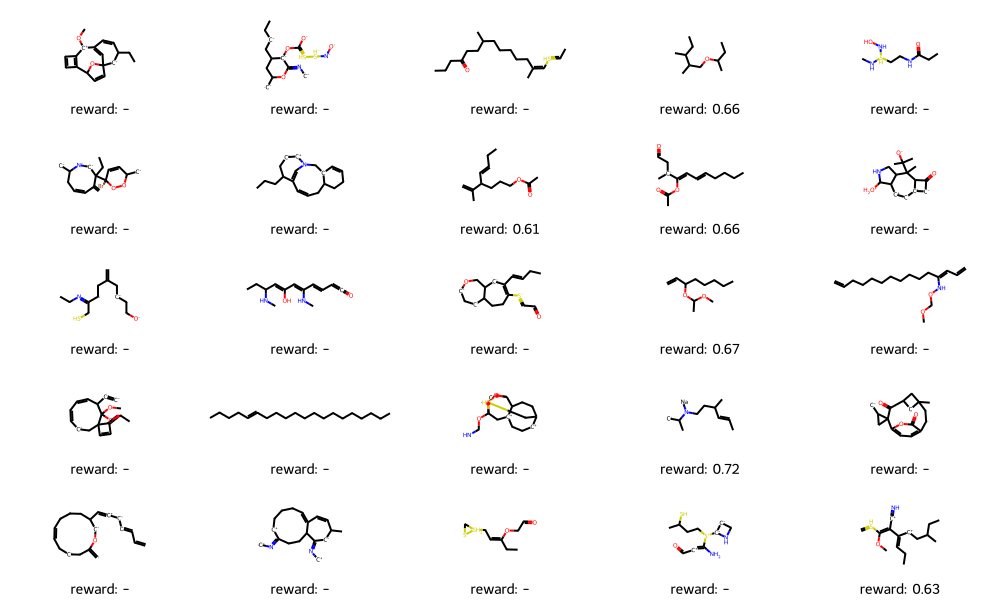

In [114]:
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' for r in rews[:25]])

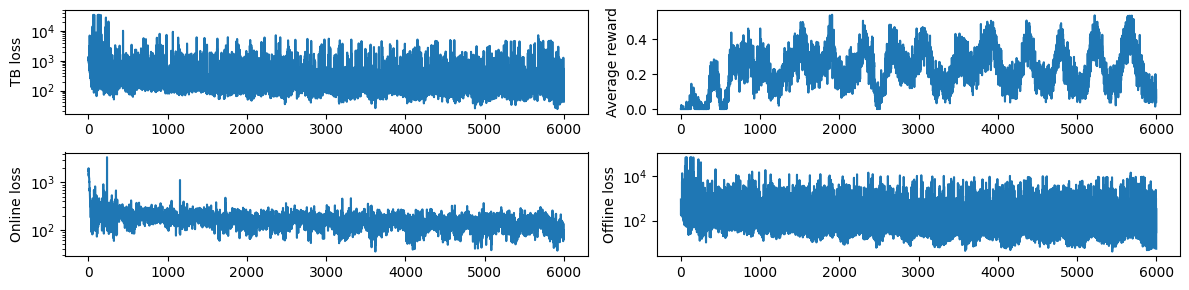

In [115]:
from src.submodels.gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator

cfg.log_dir = config.log_dir
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(2, 2, figsize=(4*3,3))
ax[0,0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('TB loss')
ax[0,1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[0,1].set_ylabel('Average reward')
#ax[0,2].plot([i.value for i in ea.Scalars('train_logZ')])
#ax[0,2].set_ylabel('Predicted logZ')
ax[1,0].plot([i.value for i in ea.Scalars('train_online_loss')])
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('Online loss')
ax[1,1].plot([i.value for i in ea.Scalars('train_offline_loss')])
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Offline loss')
#ax[2,0].plot([i.value for i in ea.Scalars('valid_online_loss')])
#ax[2,0].set_yscale('log')
#ax[2,0].set_ylabel('Validation online loss')
#ax[2,1].plot([i.value for i in ea.Scalars('valid_offline_loss')])
#ax[2,1].set_yscale('log')
#ax[2,1].set_ylabel('Validation offline loss')
pp.tight_layout()

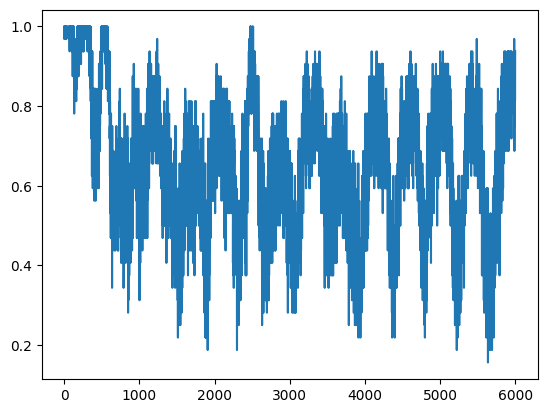

In [116]:
pp.plot([i.value for i in ea.Scalars('train_invalid_trajectories')])

3000

In [7]:
from rdkit.Chem.Draw import MolsToGridImage, MolToImage

In [55]:
# Generate molecules
trajs = trainer.algo.create_training_data_from_own_samples(trainer.model, 25)
objs = [trainer.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trainer.task.compute_obj_properties(objs)
cond_info = trainer.task.sample_conditional_information(len(obj_props), 1)
log_rewards = trainer.task.cond_info_to_logreward(cond_info, obj_props)


#MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r.exp().item():.2f}' for r in log_rewards[:25]])

In [56]:
float(sum(is_valid)/25 * 100)

56.0

In [70]:
trajs1000 = trainer.algo.create_training_data_from_own_samples(trainer.model, 1000)

In [72]:
gc.collect()

0

In [81]:
objs1000 = [trainer.ctx.graph_to_obj(i['result']) for i in trajs1000]

In [82]:
smiles1000 = [Chem.MolToSmiles(i) for i in objs1000]

In [83]:
obj_props1000, is_valid1000 = trainer.task.compute_obj_properties(objs1000)
cond_info1000 = trainer.task.sample_conditional_information(len(obj_props1000), 1)
log_rewards1000 = trainer.task.cond_info_to_logreward(cond_info1000, obj_props1000)

In [ ]:
valid_idcs = torch.tensor([i for i in range(len(trajs1000)) if trajs1000[i].get("is_valid", True)]).long()    
#valid_idcs = valid_idcs[is_valid1000]
#        all_fr = torch.zeros((len(trajs), obj_props.shape[1]))
#        all_fr[valid_idcs] = obj_props
valid_idcs = valid_idcs[is_valid1000]
valid_idcs

In [89]:
len(obj_props),len(all_fr[valid_idcs])

(14, 368)

In [92]:
all_fr = torch.zeros((len(trajs1000), obj_props1000.shape[1]))
all_fr[valid_idcs] = obj_props1000

rewards1000 = all_fr.flatten()

In [93]:
df1000 = pd.DataFrame()

In [94]:
df1000["smi"] = smiles1000
df1000["r"] = rewards1000
df1000["is_valid"] = is_valid1000

In [95]:
df1000.head()

,smi,r,is_valid
0,CCCCC=CC=C(OC=O)OC=CO,0.000000,False
1,COC(=O)C1=C2CCCCC(C)CC1=C1CCCC1C2,0.000000,False
2,[C]C12C3=CC4OC=C5CC5=C5C=C5OC(=O)OC41C=C32,0.000000,False
3,CC(O)=C1CCC=C2CC2=C2C=C2C(=O)O1,0.000000,False
4,CC(=O)C=CC=CC(=O)O,0.814059,True


In [98]:
df1000["is_valid"].sum()/1000 *100

36.8

In [108]:
df1000.to_csv("hpo_long_1000_mols.csv",index=None)

In [106]:
best25

,smi,r,is_valid
907,CCC(=O)OC1=NC(C)=C=C(C)O1,0.780537,True
71,CCC(C)C(=O)C=C=O,0.783956,True
260,CCOCCC=C(C)O,0.787198,True
852,COC=CC(C)=CC=O,0.788859,True
488,O=CC=CC=CC(=O)O,0.789632,True
593,CC=C(C=C(C)O)OCC(C)=O,0.790096,True
797,CN=C(C)C(C=O)=C(C)C,0.793672,True
264,CCOC(C)C(C)=O,0.794681,True
664,CCC=C(CO)C1=CO1,0.795786,True
86,C=C(C)C(=C=O)CC,0.798222,True


In [102]:
best25 = df1000.sort_values("r").tail(25)

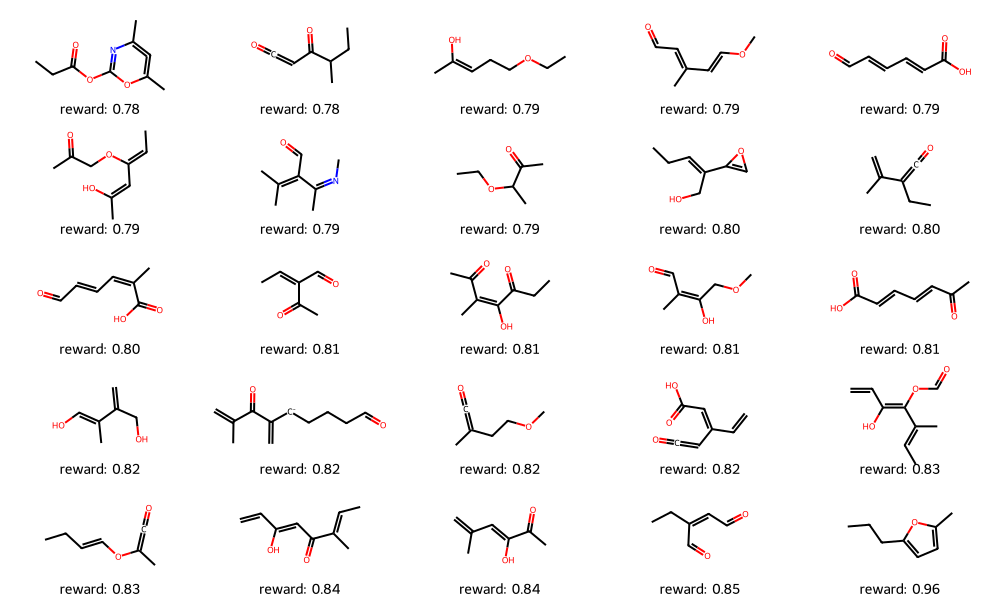

In [105]:
MolsToGridImage([Chem.MolFromSmiles(s) for s in best25["smi"]], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in best25["r"]])

In [57]:
rews = []
c = 0
for i in is_valid:
    if i:
        rews.append(round(log_rewards[c].exp().item(),2))
        c += 1
    else:
        rews.append("-")
    

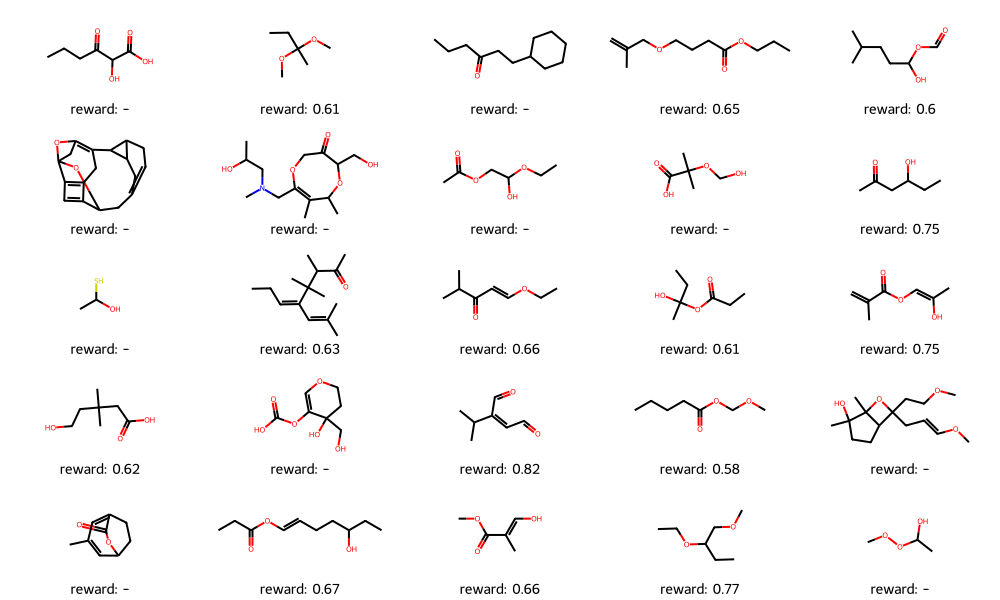

In [58]:
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' for r in rews[:25]])

In [ ]:
objs

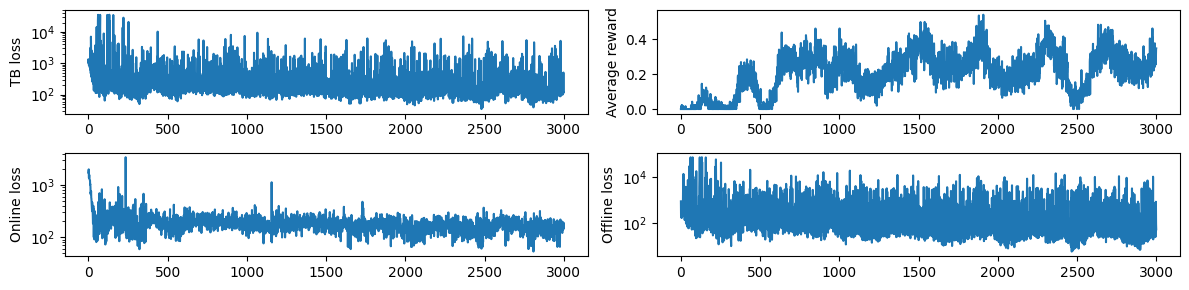

In [12]:
from src.submodels.gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator

cfg.log_dir = config.log_dir
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(2, 2, figsize=(4*3,3))
ax[0,0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('TB loss')
ax[0,1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[0,1].set_ylabel('Average reward')
#ax[0,2].plot([i.value for i in ea.Scalars('train_logZ')])
#ax[0,2].set_ylabel('Predicted logZ')
ax[1,0].plot([i.value for i in ea.Scalars('train_online_loss')])
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('Online loss')
ax[1,1].plot([i.value for i in ea.Scalars('train_offline_loss')])
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Offline loss')
#ax[2,0].plot([i.value for i in ea.Scalars('valid_online_loss')])
#ax[2,0].set_yscale('log')
#ax[2,0].set_ylabel('Validation online loss')
#ax[2,1].plot([i.value for i in ea.Scalars('valid_offline_loss')])
#ax[2,1].set_yscale('log')
#ax[2,1].set_ylabel('Validation offline loss')
pp.tight_layout()

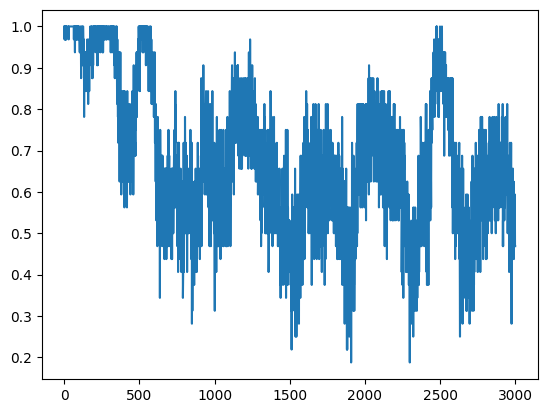

In [13]:
pp.plot([i.value for i in ea.Scalars('train_invalid_trajectories')])

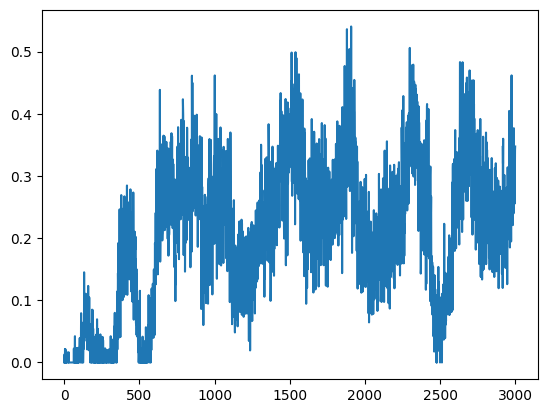

In [14]:
pp.plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])

In [15]:
import sqlite3
import pandas as pd
from rdkit.Chem.Draw import MolsToGridImage, MolToImage
import numpy as np
from rdkit import Chem

In [16]:
log_dir = config.log_dir

In [17]:
conn = sqlite3.connect(f"{log_dir}/train/generated_objs_0.db")

In [18]:
df = pd.read_sql_query("SELECT * FROM results", conn)

In [19]:
top_rewards = df.sort_values(by='r', ascending=False).head(25)

In [60]:

# MCF imports
from molecule_validation import is_odorant, score_molecule
def hard_filter(mol):
    return int(int(is_odorant(mol)[0]) * score_molecule(mol).all())

In [64]:
hard_filter(Chem.MolFromSmiles("CC"))

0

In [68]:
[hard_filter(Chem.MolFromSmiles(i)) for i in top_rewards["smi"][:25]]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [69]:
[score_molecule(Chem.MolFromSmiles(i)) for i in top_rewards["smi"][:25]]

[array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1])]

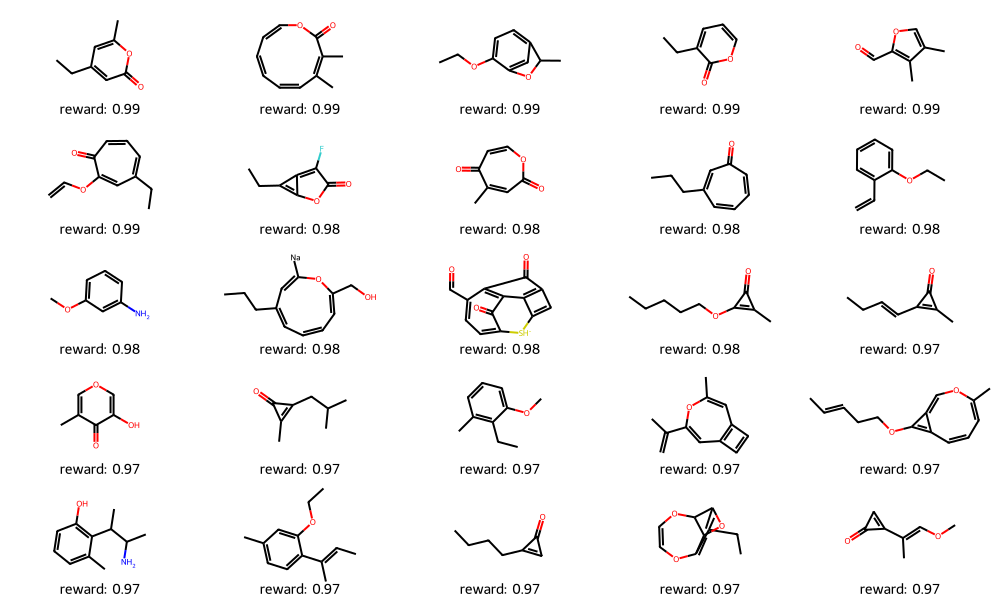

In [20]:
# Generate molecules
objs = [Chem.MolFromSmiles(smiles) for smiles in top_rewards["smi"]]
rewards = top_rewards["r"]


MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards[:25]])

In [23]:
Chem.MolToSmiles(objs[4])

'Cc1coc(C=O)c1C'

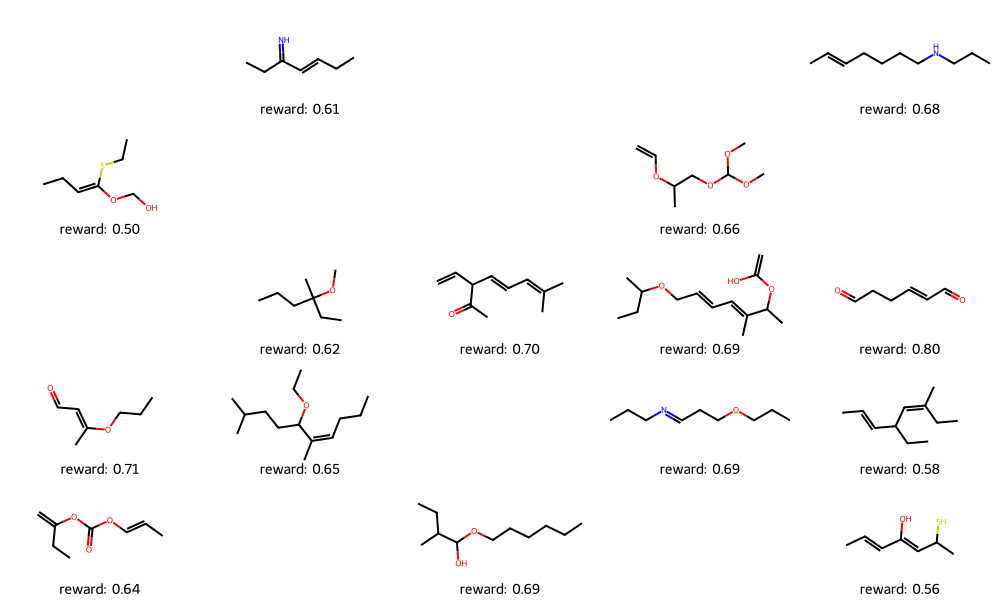

In [24]:
# Generate molecules

objs = [Chem.MolFromSmiles(smiles) for smiles in df[-32:]["smi"]]
rewards = df[-32:]["r"]


MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards[:25]])

In [ ]:
# Utils
import warnings
import os

# Plotting
from rdkit.Chem.Draw import MolsToGridImage
import matplotlib.pyplot as plt
import seaborn as sns

# File management
import json
import numpy as np
import pandas as pd


# GFlowNET
import gflownet
from src.submodels.gflownet.algo.trajectory_balance import TrajectoryBalance
from src.submodels.gflownet.envs.graph_building_env import GraphBuildingEnv
from src.submodels.gflownet.config import init_empty, Config

# OpenPOM
 from submodels.openpom.functions import fragance_propabilities_from_smiles_test, fragance_propabilities_from_smiles_train

# Others
from tensorboard.backend.event_processing import event_accumulator
import torch
from rdkit import Chem

In [ ]:
# Model class must be defined somewhere
state = torch.load(os.path.join(log_dir, "model_final_save.pt"), weights_only=False)
#model = statemodel.eval()
#state["models_state_dict"]
config = state["cfg"]
env_ctx = state["env_ctx"]

In [ ]:
model = src.submodels.gflownet.models.graph_transformer.GraphTransformerGFN(state["env_ctx"],state["cfg"])
model.load_state_dict(state["models_state_dict"][0])
model.eval()

In [ ]:
algo = TrajectoryBalance(GraphBuildingEnv(),state["env_ctx"],state["cfg"])

In [ ]:
from src.submodels.gflownet.envs.mol_building_env import MolBuildingEnvContext

In [ ]:
ctx = MolBuildingEnvContext(
            ['Br', 'C', 'Cl', 'F', 'Fe', 'N', 'Na', 'O', 'S'],
            #["C", "N", "F", "O"],
            #charges=[0],  # disable charge
            chiral_types=[Chem.rdchem.ChiralType.CHI_UNSPECIFIED],  # disable chirality
            expl_H_range=[0,1],
            num_cond_dim=1,
            max_nodes=20,
        )

In [ ]:
# Generate molecules
trajs = algo.create_training_data_from_own_samples(model, 25)
objs = [ctx.graph_to_obj(i['result']) for i in trajs]

In [ ]:
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120))